In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(rc = {'figure.figsize':(16,9)})

## Import data and preprocessing

In [3]:
# Define columns name
column1 = ["machine_name", "cycle", "operational_setting_1", "operational_setting_2", "operational_setting_3"]
column2 = [f'sensor_measurement_{i:02}' for i in range(1,22)]
columns = column1 + column2

In [11]:
turbine = pd.read_csv('../data/train_FD002.txt', sep = "\s+", header = None, names = columns)

In [12]:
turbine.head()

,machine_name,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_01,sensor_measurement_02,sensor_measurement_03,sensor_measurement_04,sensor_measurement_05,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


### create cencored data

If we look at the data above, the data we have does not include observations that are right-censored. To obtain such observations, we follow these steps:

1. Selecting the maximum cycle until the machine fails for each machine.
2. Assuming the end time limit of observation.

In [13]:
# Select maximum cycle
max_cycle = turbine.groupby(by = "machine_name")['cycle'].transform(max)
turbine = turbine[turbine["cycle"] == max_cycle].set_index('machine_name')
turbine.head()

,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_01,sensor_measurement_02,sensor_measurement_03,sensor_measurement_04,sensor_measurement_05,sensor_measurement_06,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
machine_name,,,,,,,,,,,,,,,,,,,,,
1,149,42.0017,0.8414,100.0,445.00,550.49,1366.01,1149.81,3.91,5.71,...,129.55,2387.40,8066.19,9.4765,0.02,332,2212,100.0,10.45,6.2285
2,269,42.0047,0.8411,100.0,445.00,550.11,1368.75,1146.65,3.91,5.72,...,129.76,2388.42,8110.26,9.4315,0.02,334,2212,100.0,10.56,6.2615
3,206,42.0073,0.8400,100.0,445.00,550.80,1356.97,1144.89,3.91,5.72,...,130.02,2387.87,8082.25,9.4962,0.02,333,2212,100.0,10.46,6.3349
4,235,0.0030,0.0007,100.0,518.67,643.68,1605.86,1428.21,14.62,21.61,...,520.25,2388.17,8215.14,8.5784,0.03,397,2388,100.0,38.47,22.9717
5,154,42.0049,0.8408,100.0,445.00,550.53,1364.82,1146.87,3.91,5.72,...,130.05,2389.19,8151.36,9.4339,0.02,333,2212,100.0,10.74,6.3906


Next, we create a lollipop plot to obtain the distribution of maximum cycles for each machine.

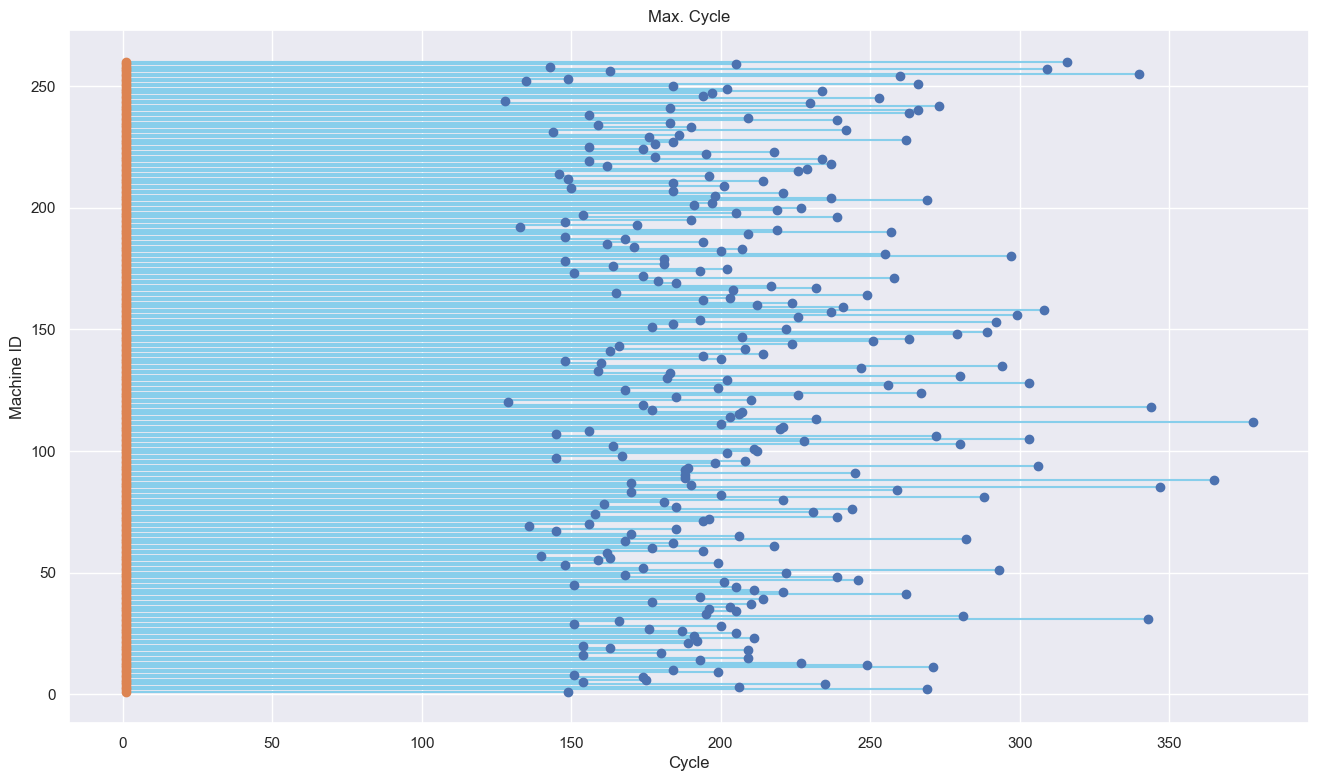

In [15]:
# Lollipop plot for each machine name
plt.hlines(y=turbine.index, xmin=1, xmax=turbine['cycle'], color='skyblue')
plt.plot(turbine['cycle'], turbine.index, "o")
plt.plot([1 for i in range(len(turbine))], turbine.index, "o")

# Add titles and axis names
plt.title("Max. Cycle")
plt.xlabel('Cycle')
plt.ylabel('Machine ID')

# Show the plot
plt.show()

We assume that the end time limit of observation is 220 cycles, so if a machine is still active after 220 cycles, it will be considered right-censored.

In [16]:
# create a status column for each machine
turbine['status'] = turbine['cycle'].apply(lambda x: False if x > 220 else True)

The True status of the machine indicates that the machine failed during the observation period, while False indicates that the machine did not experience a failure during the observation period.

In [18]:
# Distribution of each status
turbine['status'].value_counts()

status
True     179
False     81
Name: count, dtype: int64